In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly
import warnings
import sklearn
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, classification_report
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
import pickle
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("loan-train.csv")

In [7]:
print(f"No. of Nominal Categorical data columns: {3}")
print(f"No. of Ordinal Categorical data columns: {5}")
print(f"No. of Numerical data columns: {5}")
print("-----------------------------------------------")
print('No. of missing values in train dataset:')
print(train.isnull().sum())
print("-----------------------------------------------")
print(f'No. of duplicates in train dataset: {train.duplicated().sum()}') #no duplicates
print("-----------------------------------------------")

print(train.info())

No. of Nominal Categorical data columns: 3
No. of Ordinal Categorical data columns: 5
No. of Numerical data columns: 5
-----------------------------------------------
No. of missing values in train dataset:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
-----------------------------------------------
No. of duplicates in train dataset: 0
-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null 

In [9]:
catogorical=df.select_dtypes(include="object")
numerical=df.select_dtypes(exclude="object")

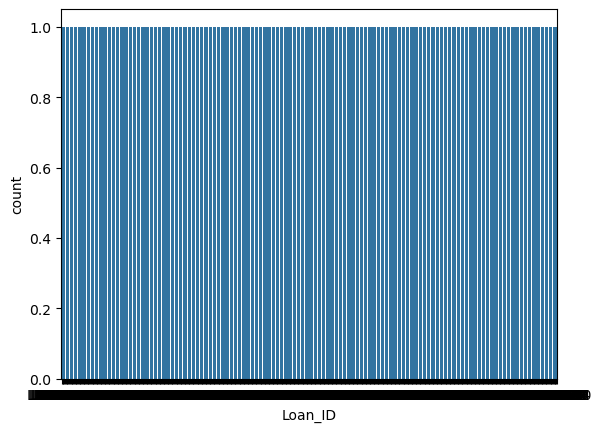

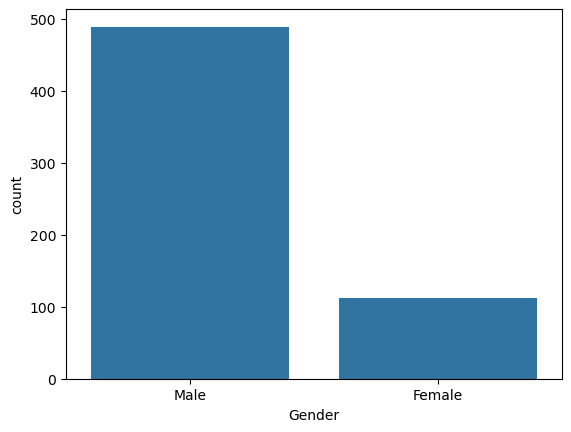

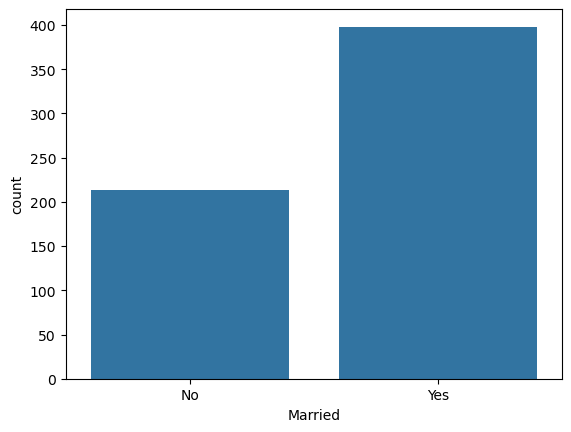

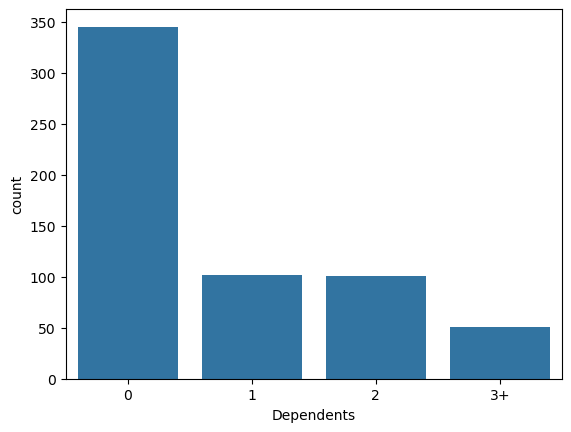

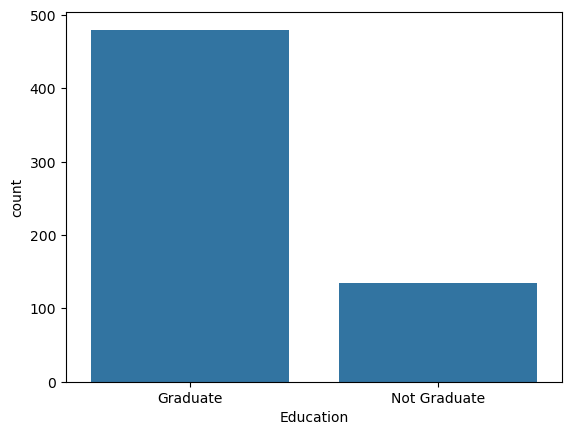

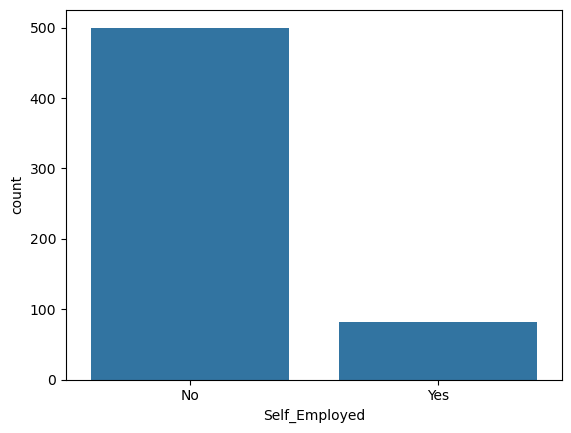

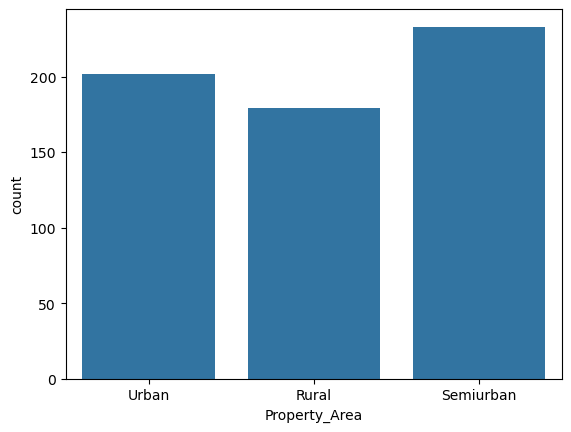

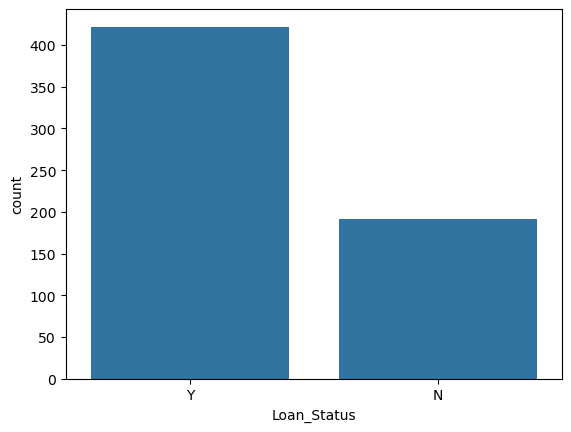

In [10]:
for data in catogorical:
    sns.countplot(x=data,data=df)
    plt.show()

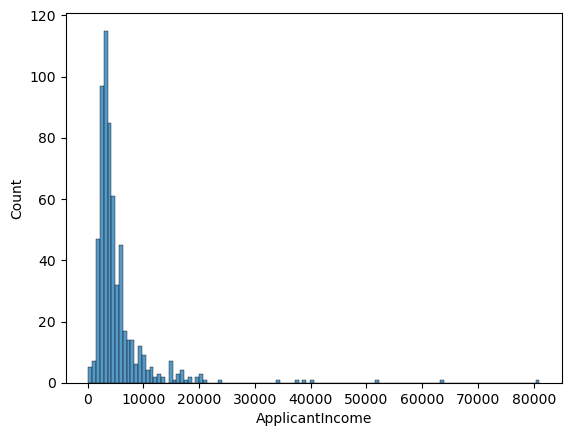

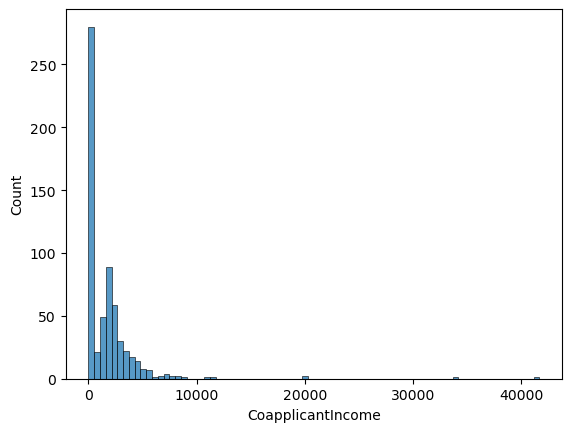

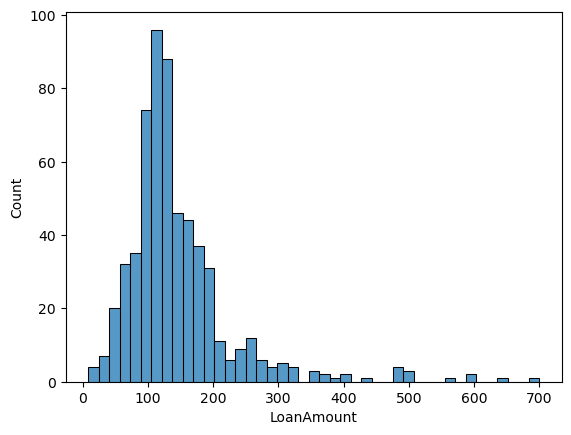

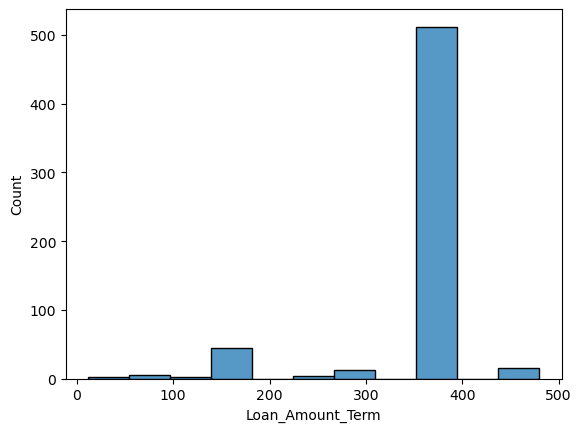

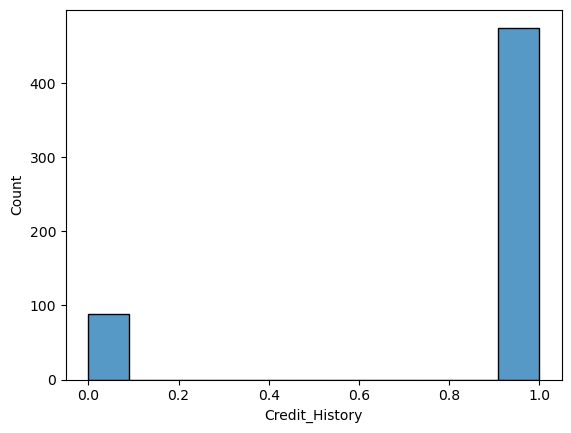

In [11]:
for data in numerical:
    sns.histplot(x=data,data=df)
    plt.show()

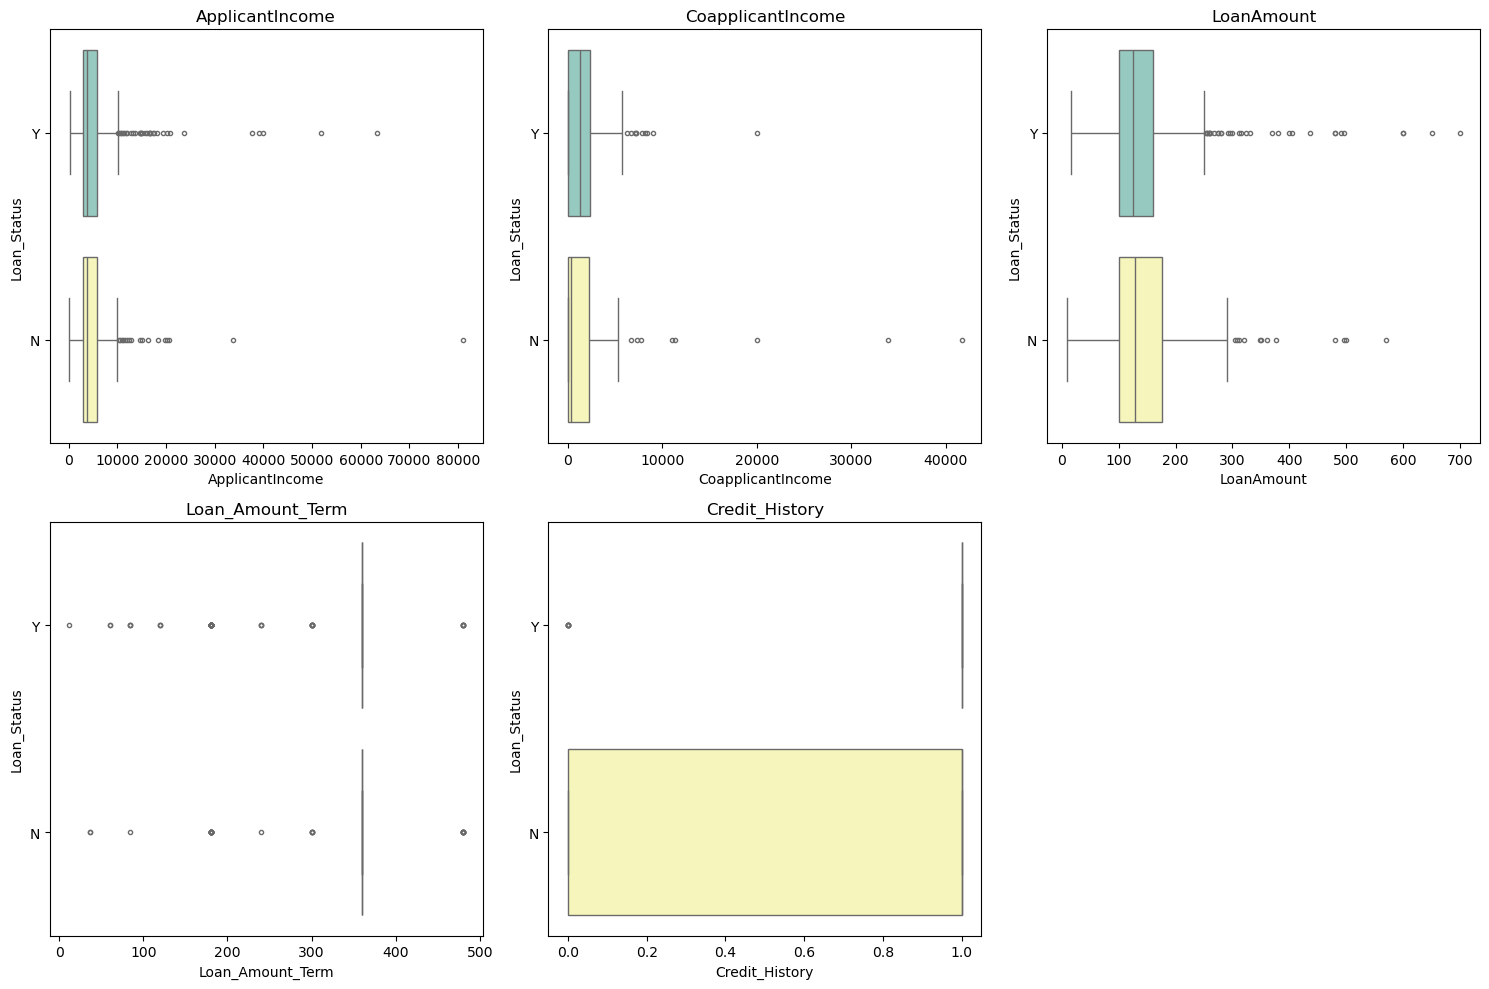

In [12]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = [col for col in numerical_columns if col != 'Loan_Status']

n_cols = 3
n_rows = (len(numerical_columns) - 1) // n_cols + 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Create boxplots for each numerical column
for i, col in enumerate(numerical_columns):
    sns.boxplot(y='Loan_Status', x=col, data=df, ax=axes[i], palette='Set3', orient='h',fliersize=3)
    axes[i].set_title(col)
#     axes[i].set_xlabel('Loan_Status')
#     axes[i].set_ylabel(col)

# Remove any unused subplots
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [13]:
df['Gender'] = df['Gender'].fillna(value='Not Known')
df['Married'] = df['Married'].fillna(value='Not Specified')
df['Dependents'] = df['Dependents'].fillna(value='Unknown')
df['Self_Employed'] = df['Self_Employed'].fillna(value='Not Specified')
df['LoanAmount'] = df['LoanAmount'].fillna(value=df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(value=df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(value=df['Credit_History'].median())

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [24]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Education']=le.fit_transform(df['Education'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [25]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,2,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,2,0,0,2,3000,0.0,66.0,360.0,1.0,2,1
3,1,2,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [27]:
X=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

In [28]:
scaler = StandardScaler()
columns=X.columns

In [29]:
X=scaler.fit_transform(X)

In [30]:
X=pd.DataFrame(X,columns=columns)

<Axes: >

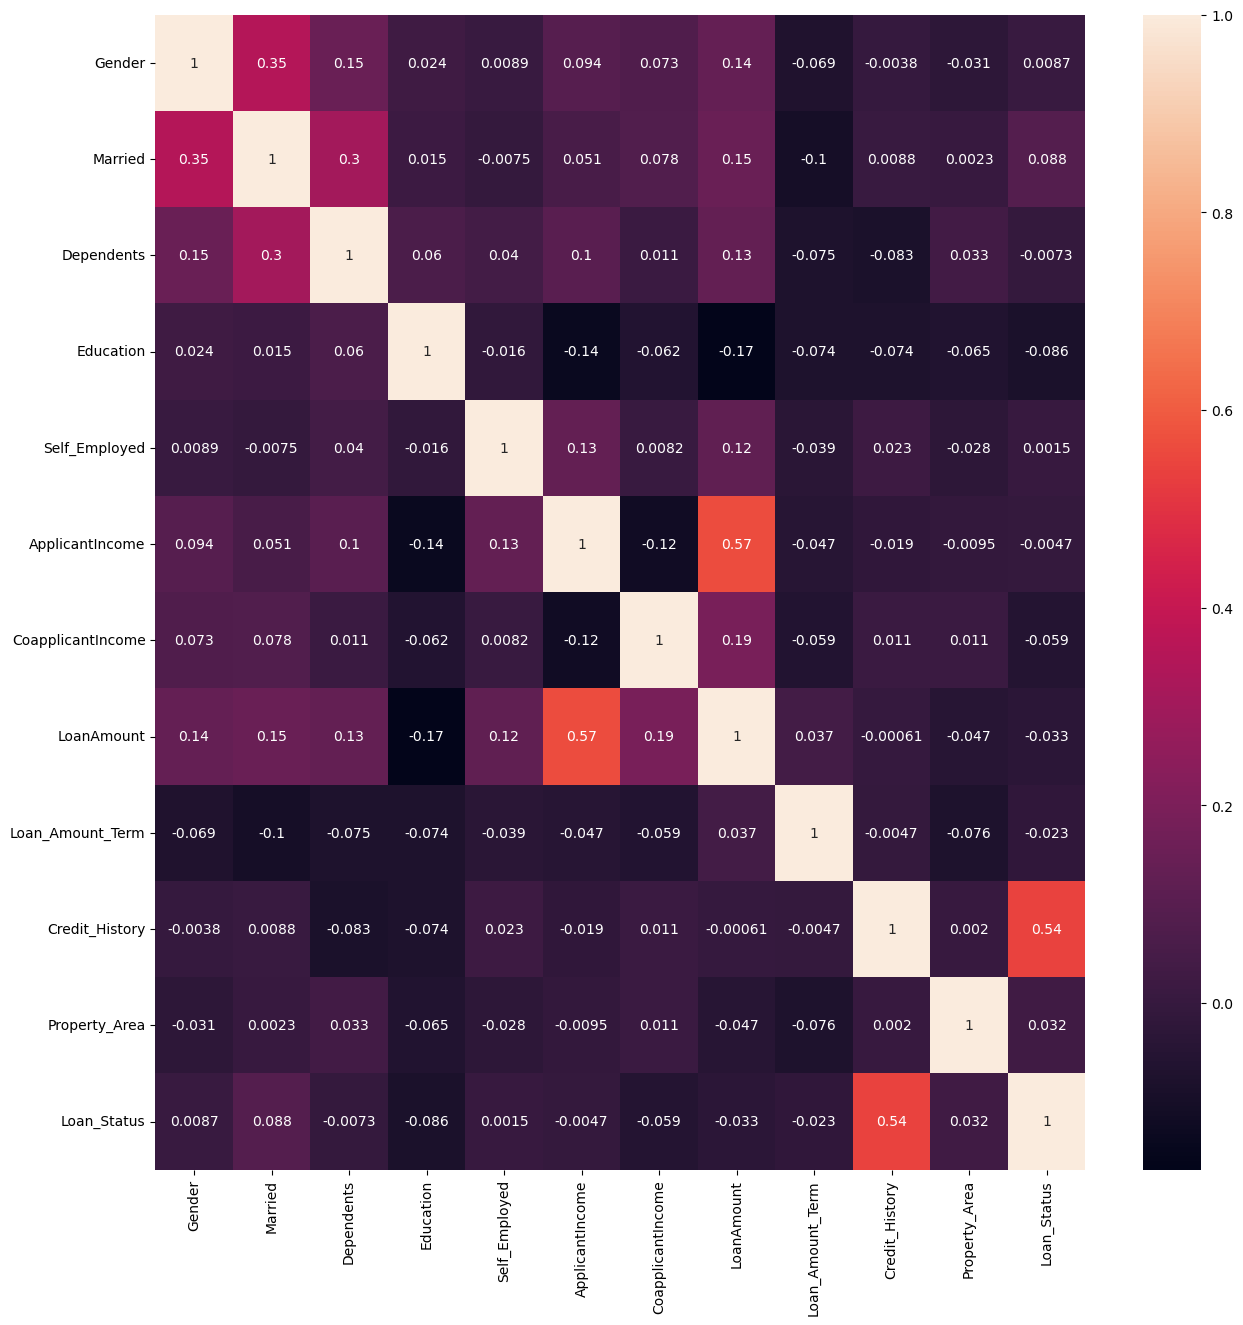

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [32]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.382616,-1.368405,-0.752060,-0.528362,-0.458646,0.072991,-0.554487,-0.211241,0.273231,0.411733,1.223298
1,0.382616,0.734726,0.141102,-0.528362,-0.458646,-0.134412,-0.038732,-0.211241,0.273231,0.411733,-1.318513
2,0.382616,0.734726,-0.752060,-0.528362,2.414909,-0.393747,-0.554487,-0.948996,0.273231,0.411733,1.223298
3,0.382616,0.734726,-0.752060,1.892641,-0.458646,-0.462062,0.251980,-0.306435,0.273231,0.411733,1.223298
4,0.382616,-1.368405,-0.752060,-0.528362,-0.458646,0.097728,-0.554487,-0.056551,0.273231,0.411733,1.223298


In [33]:
X=X.drop(['Loan_Amount_Term','CoapplicantIncome'],axis=1)

In [37]:
models = {
    'SVC': SVC(),
    'LinearSVC': LinearSVC(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'BernoulliNB': BernoulliNB(),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'NearestCentroid': NearestCentroid()
}

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
for model_name, model in models.items():
    model.fit(X_train, y_train)

    score = model.score(X_test, y_test)
    print(f'{model_name} Accuracy: {score:.4f}')

SVC Accuracy: 0.7967
LinearSVC Accuracy: 0.7886
LogisticRegression Accuracy: 0.7886
RandomForestClassifier Accuracy: 0.7805
GradientBoostingClassifier Accuracy: 0.7480
DecisionTreeClassifier Accuracy: 0.6911
BernoulliNB Accuracy: 0.7886
GaussianNB Accuracy: 0.7805
KNeighborsClassifier Accuracy: 0.7236
NearestCentroid Accuracy: 0.7886
